In [1]:
library('tidyverse')

data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-11/colony.csv'

df_bees = read_csv(data_url, col_type = cols()) |>
    mutate(
        season = case_when(
            months == 'October-December' ~ 'winter',
            months == 'January-March' ~ 'winter',
            TRUE ~ 'summer'
        ),
    ) |>
    group_by(year, state, season)

df_bees |> head()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


year,months,state,colony_n,colony_max,colony_lost,colony_lost_pct,colony_added,colony_reno,colony_reno_pct,season
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2015,January-March,Alabama,7000,7000,1800,26,2800,250,4,winter
2015,January-March,Arizona,35000,35000,4600,13,3400,2100,6,winter
2015,January-March,Arkansas,13000,14000,1500,11,1200,90,1,winter
2015,January-March,California,1440000,1690000,255000,15,250000,124000,7,winter
2015,January-March,Colorado,3500,12500,1500,12,200,140,1,winter
2015,January-March,Connecticut,3900,3900,870,22,290,NA,NA,winter


Warning message:
“Removed 54 rows containing missing values (geom_point).”


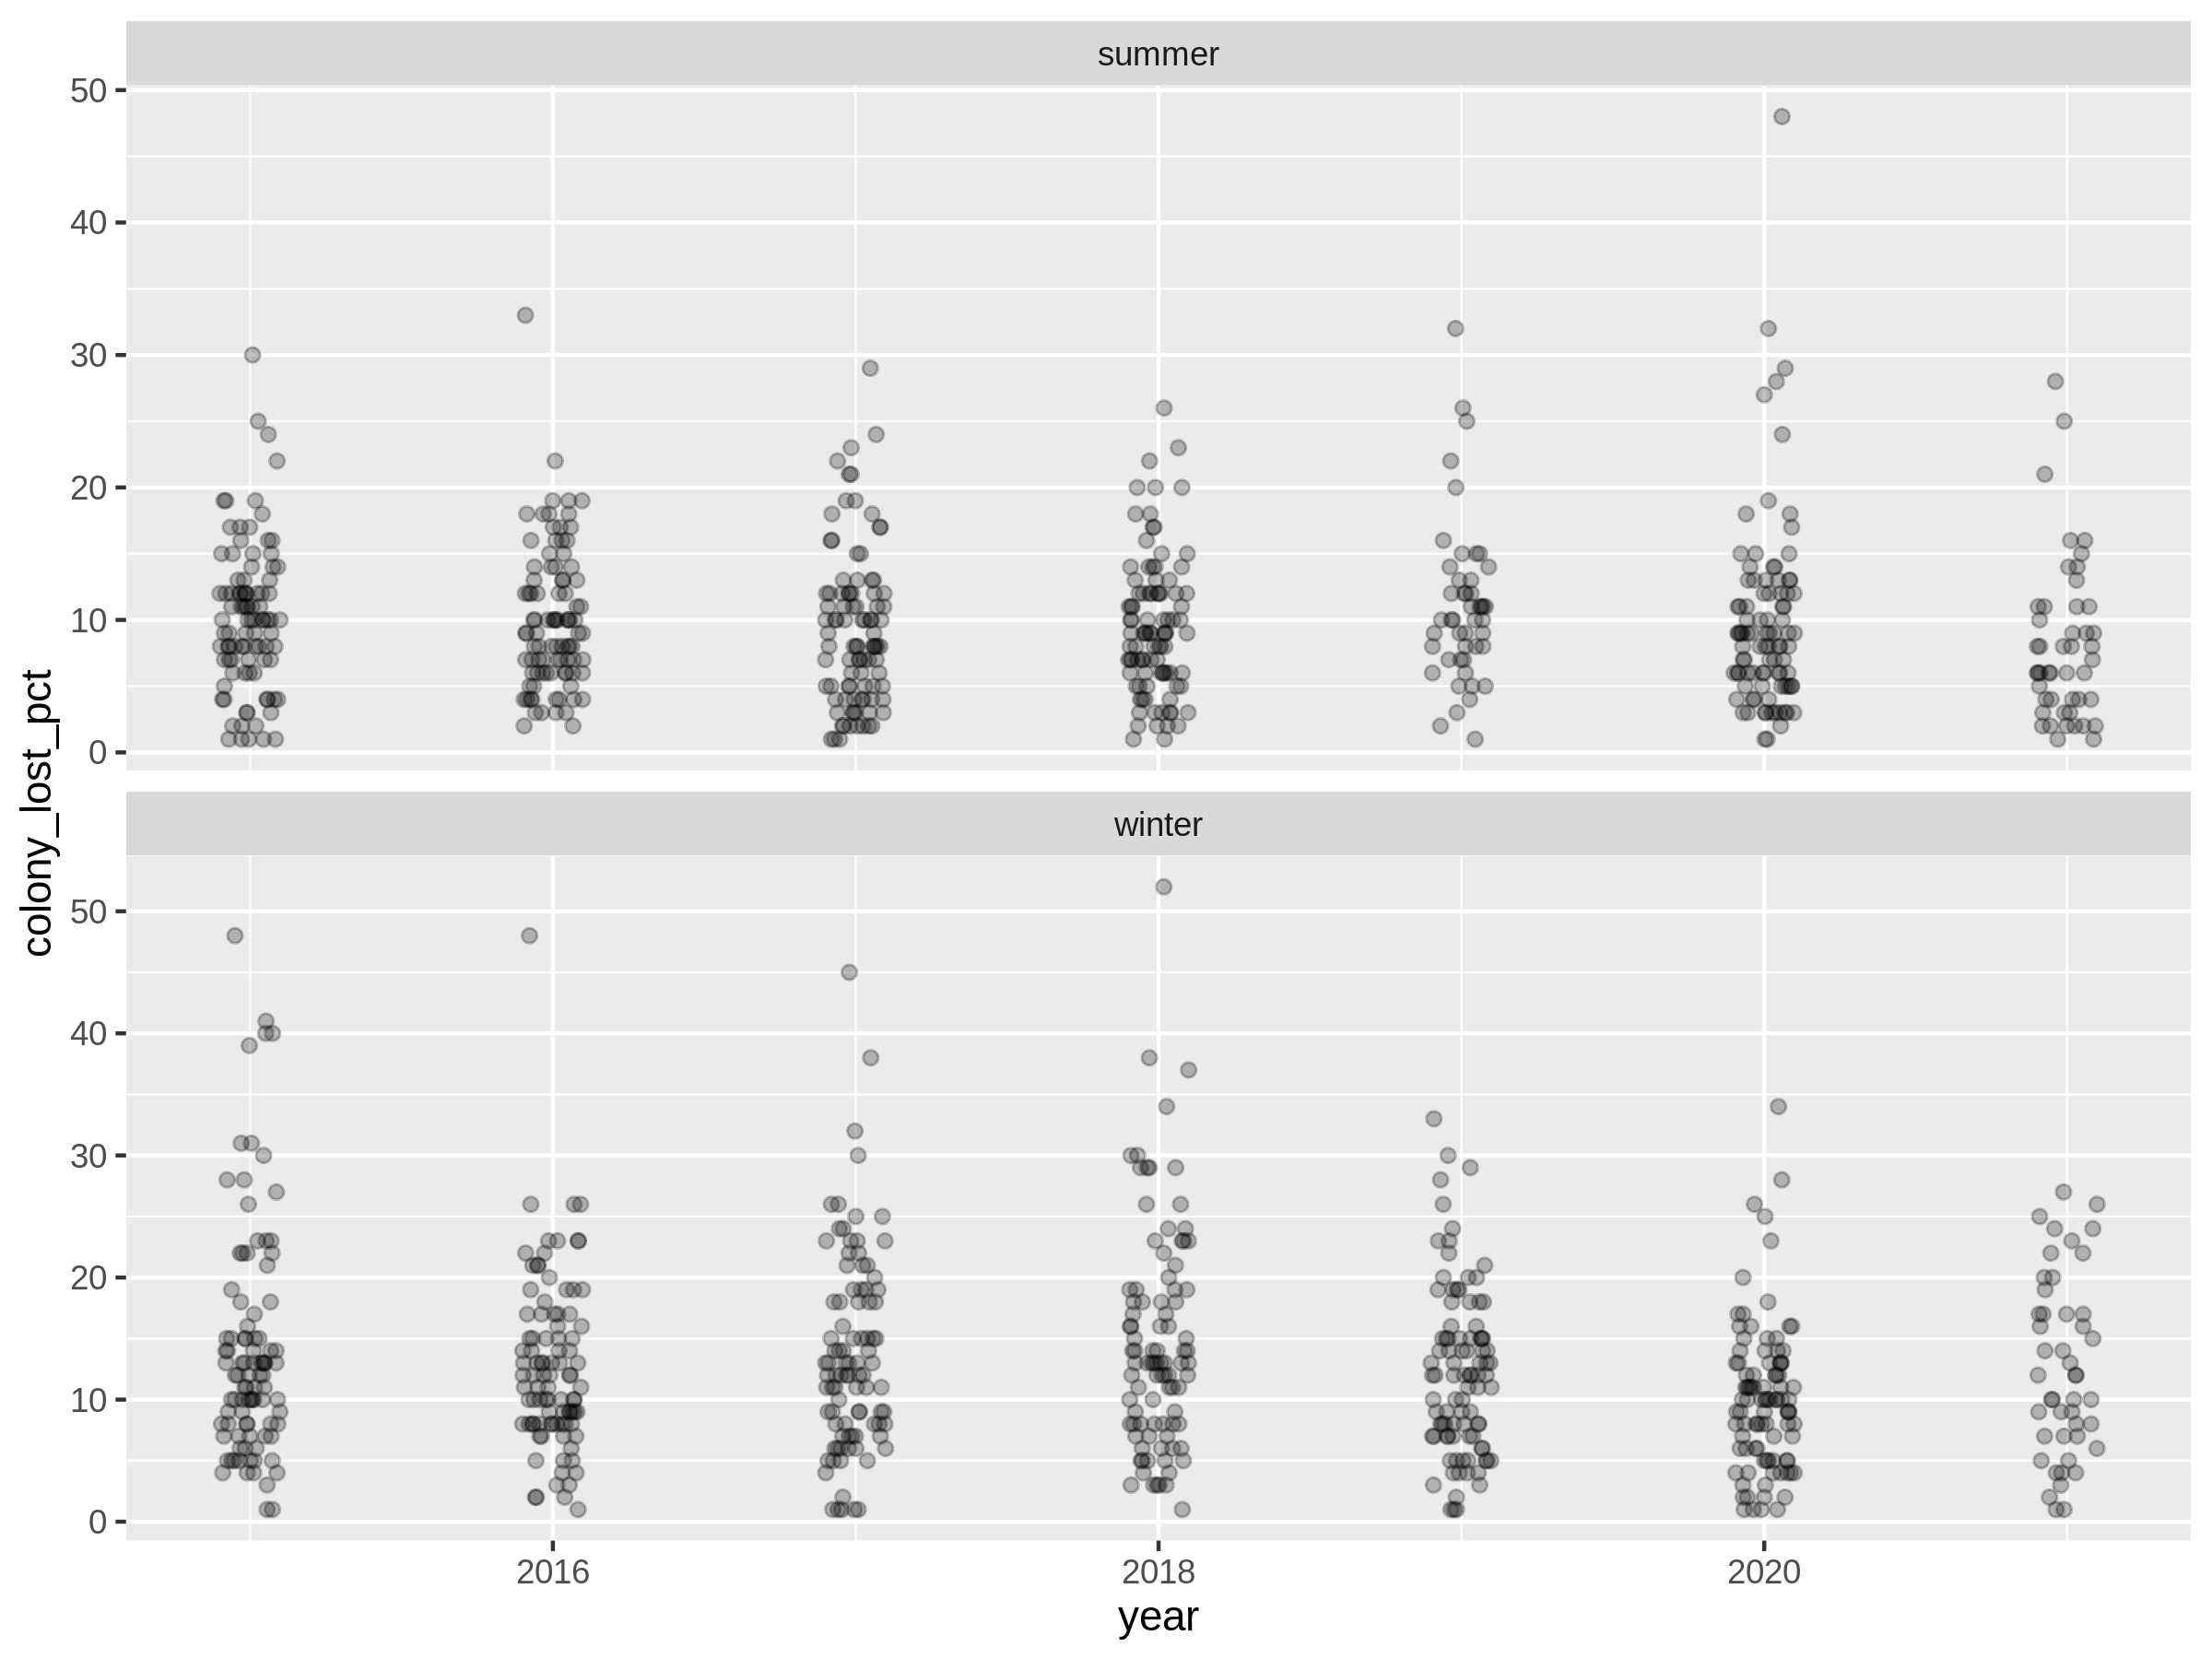

In [21]:
options(repr.plot.height = 6, repr.plot.width = 8)

p = ggplot(df_bees, aes(x = year, y = colony_lost_pct)) + geom_point(position=position_jitter(height=0, width=0.1), alpha= 0.25)

p = p+ facet_wrap(~season, ncol=1, scales='free_y')

p

#to shuffle points in x direction we use jitter

#alpha makes the shades different

#now we want to make a median line/central tendency like in the first figure. 

